In [ ]:
# Importing necessary libraries numpy, pandas, pyplot, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import linear_model, LinearRegression, Ridge, lasso, GridSearchCV from sklearn
from sklearn import linear_model
# import os
import os


# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# reading the CarPrice_Assignment
cars = pd.read_csv("/content/CarPrice_Assignment.csv")

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Check each symboling attribute's count
cars['symboling'].value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


In [ ]:
#Check each aspiration attribute's count
cars['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


In [ ]:
#Check each drivewheel attribute's count
cars['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


<Axes: xlabel='wheelbase', ylabel='Density'>

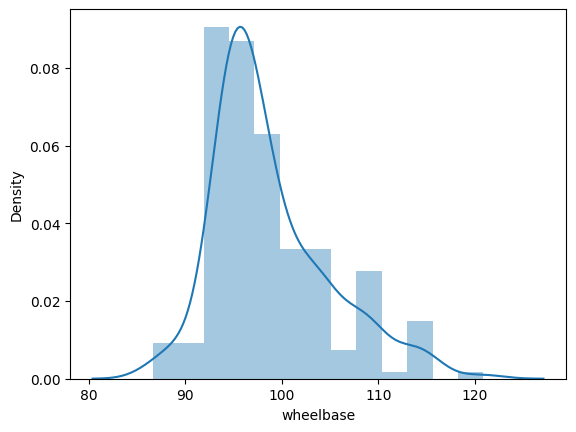

In [ ]:
# plot wheetbase distribution
sns.distplot(cars['wheelbase'])

<Axes: xlabel='curbweight', ylabel='Density'>

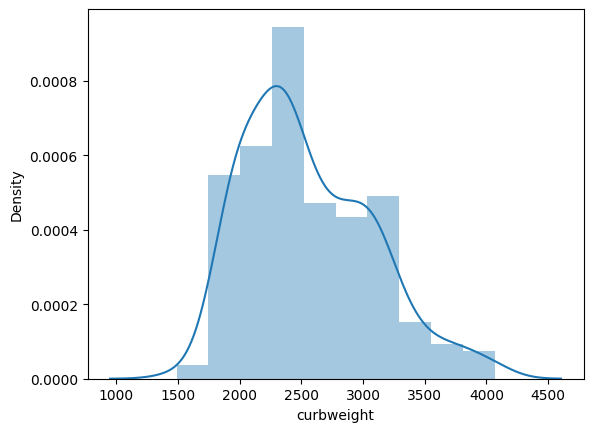

In [ ]:
# plot curbweight distribution
sns.distplot(cars['curbweight'])

<Axes: xlabel='stroke', ylabel='Density'>

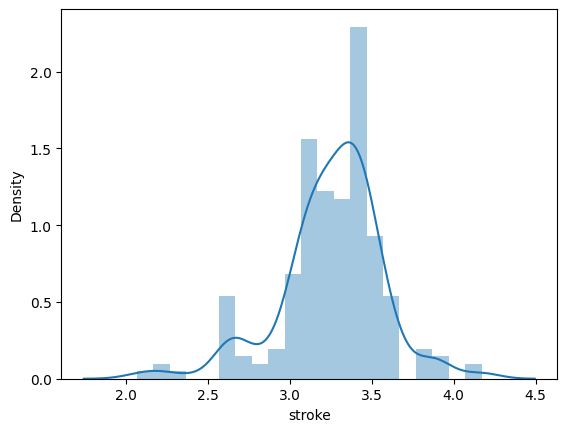

In [ ]:
# plot stroke dsitribution
sns.distplot(cars['stroke'])

<Axes: xlabel='compressionratio', ylabel='Density'>

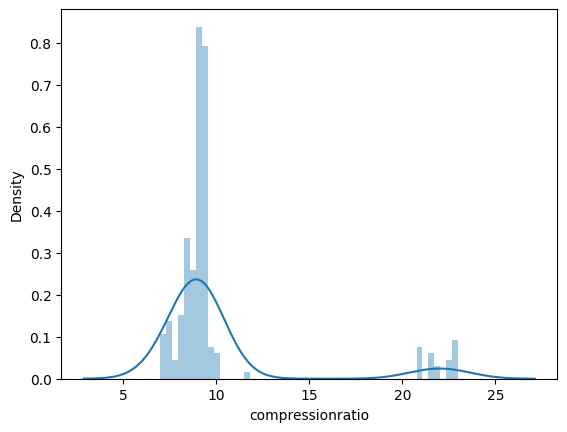

In [ ]:
# plot compressionratio distribution
sns.distplot(cars['compressionratio'])

<Axes: xlabel='price', ylabel='Density'>

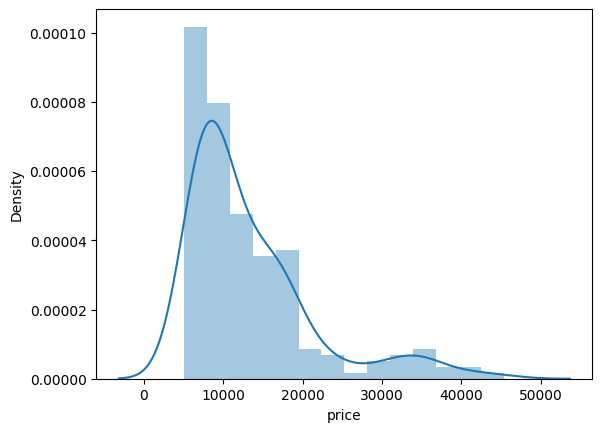

In [ ]:
# Price distribution
sns.distplot(cars['price'])

In [ ]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])

#head
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# dropping symboling and car_ID
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
# print head
cars_numeric.head()


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


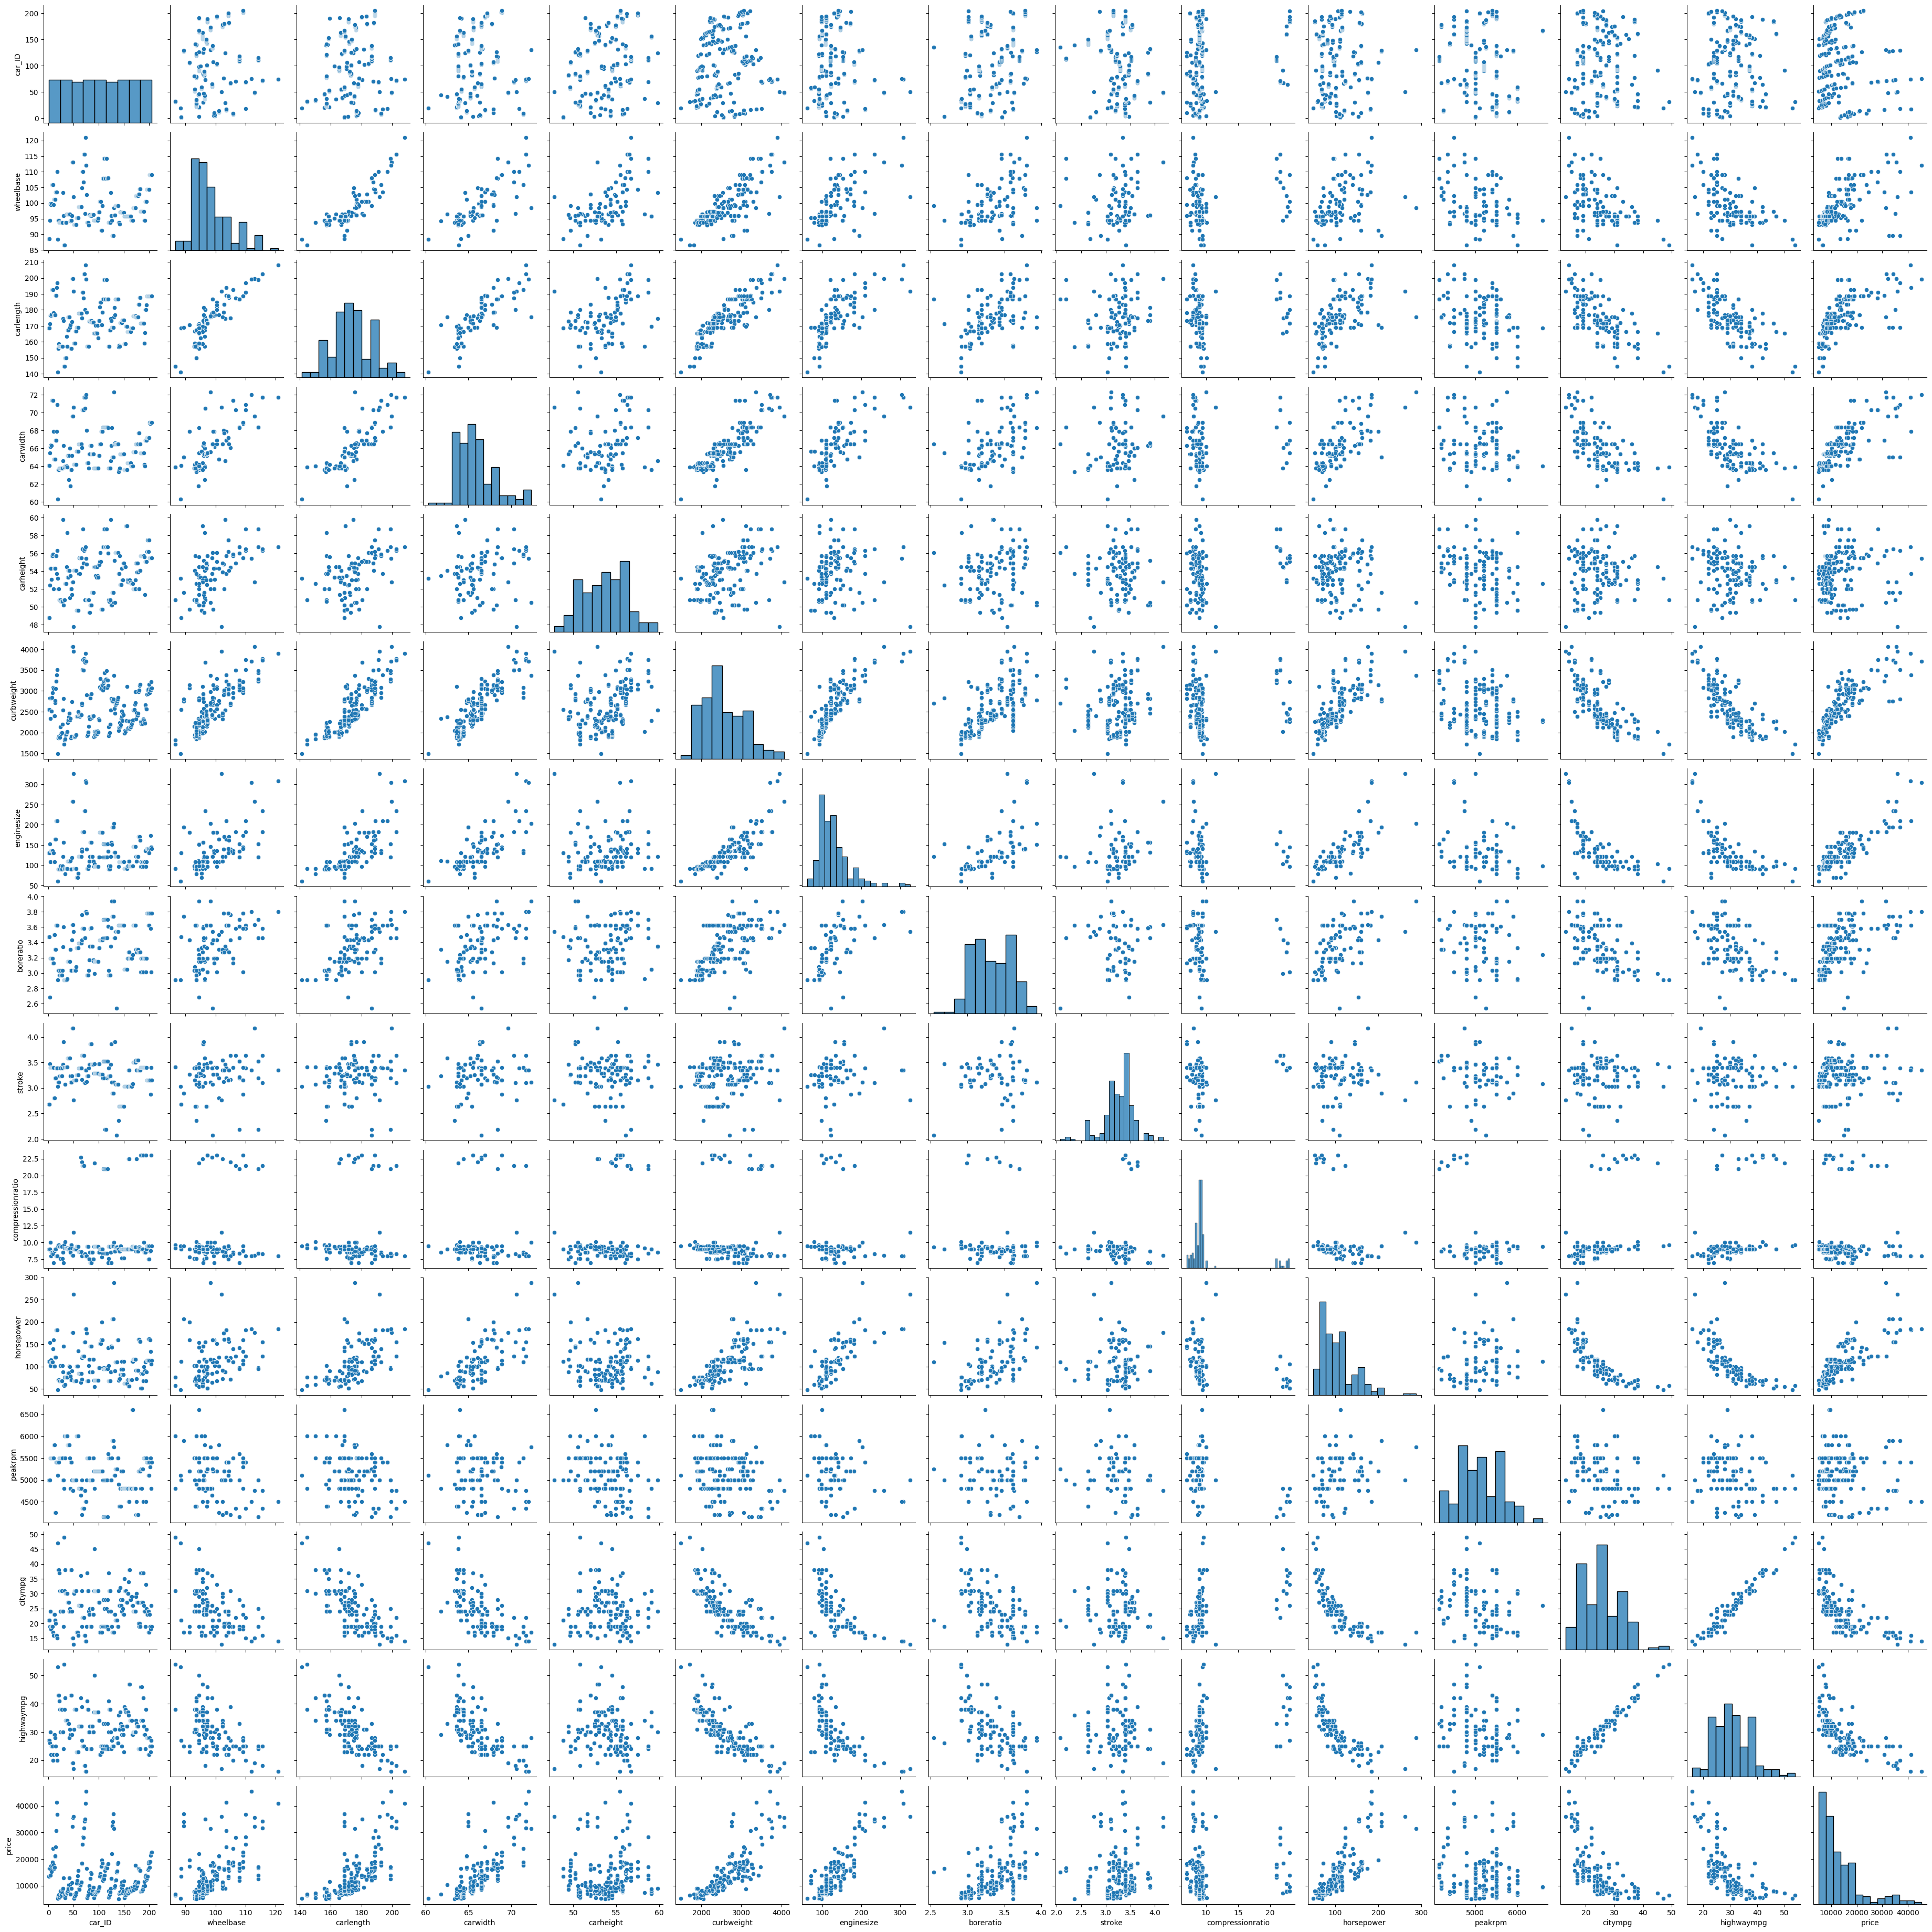

In [ ]:
# paiwise scatter plot
sns.pairplot(cars_numeric)

In [ ]:
# correlation matrix
cor = cars_numeric.corr()
cor

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<Axes: >

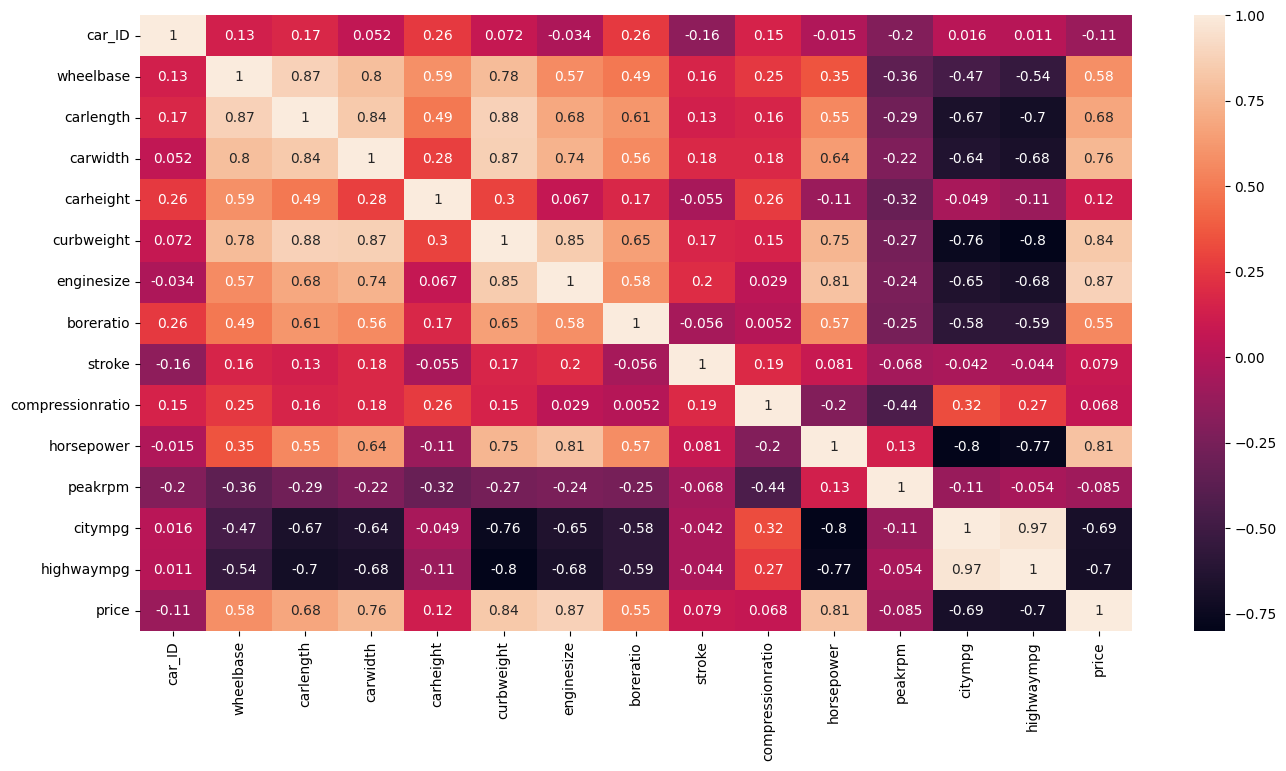

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, annot=True)


In [ ]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# converting symboling to categorical by changing its datatype to
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# CarName: first few entries (upto 30)
cars['CarName'].head(30)

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
5,audi fox
6,audi 100ls
7,audi 5000
8,audi 4000
9,audi 5000s (diesel)


In [ ]:
# Extracting carname
cars['CarName'] = cars['CarName'].str.split(' ', expand=True)[0]

# Method 1: str.split() by space
carnames = cars['CarName'].unique()

# Print CarName: first few entries (upto 30)
print("CarName: \n", carnames[:30])

CarName: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
# Method 2: Use regular expressions


# regex: any alphanumeric sequence before a space, may contain a hyphen
p = r'^(\w+-?\w+)'

#apply above regex pattern to CarName
carnames = cars['CarName'].str.extract(p, expand=True)

#print carnames
print(carnames[:])

               0
0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
..           ...
200        volvo
201        volvo
202        volvo
203        volvo
204        volvo

[205 rows x 1 columns]


In [ ]:
# New column car_company
cars['car_company'] = carnames

In [ ]:
# look at all values
cars['car_company'].value_counts()

,count
car_company,
toyota,31
nissan,17
mazda,15
honda,13
mitsubishi,13
subaru,12
volvo,11
peugeot,11
dodge,9


In [ ]:
# replacing misspelled car_company names using loc

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars.loc[(cars['car_company'] == "porcshce"), 'car_company'] = 'porsche'

# toyota
cars.loc[(cars['car_company'] == "toyouta"), 'car_company'] = 'toyota'

# nissan
cars.loc[(cars['car_company'] == "Nissan"), 'car_company'] = 'nissan'

# mazda
cars.loc[(cars['car_company'] == "maxda"), 'car_company'] = 'mazda'

In [ ]:
# print catgeorywise car company value counts
cars['car_company'].value_counts()

,count
car_company,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugeot,11


In [ ]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [ ]:
# car basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
# cars statistical discription
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Define X
X = cars.drop('price', axis=1)
# Define y
y = cars['price']

In [ ]:
# subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])


# cars_categorical head
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True, dtype= int)

# cars_dummies head
cars_dummies.head()


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop categorical variables from X
X = X.drop(list(cars_categorical.columns), axis=1)

# X head
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [ ]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

# X head
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after
# scaling (the df is converted to a numpy array)
cols = X.columns

# scaling X and converting to Dtaframe
X = pd.DataFrame(scale(X))


#renaming X columns as cols
X.columns = cols

#print columns in X
X.columns

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_ch

In [ ]:
# split into train and test with train_size=70% and random_state=100
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = linear_model.Ridge()

from sklearn.model_selection import KFold
# defining cross validation folds as 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define GridSearchCV
model_cv = GridSearchCV(estimator=ridge, param_grid=params, cv=folds, return_train_score=True)

# fit GridSearchCV() with X_train and y_train
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True)

In [ ]:
# Save GridSearchCV results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha'] <= 200]

#print cv_results
cv_results


# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004599,0.001314,0.003142,0.000441,0.0001,{'alpha': 0.0001},0.548422,0.699797,0.405818,0.874477,...,0.536008,0.247515,28,0.988664,0.975982,0.981884,0.977630,0.978485,0.980529,0.004501
1,0.004219,0.000340,0.002945,0.000123,0.0010,{'alpha': 0.001},0.562116,0.712109,0.412762,0.875320,...,0.544007,0.246896,27,0.988661,0.975979,0.981884,0.977627,0.978483,0.980527,0.004501
2,0.004097,0.000322,0.003101,0.000231,0.0100,{'alpha': 0.01},0.639411,0.786177,0.475448,0.877538,...,0.598467,0.235765,26,0.988507,0.975832,0.981847,0.977477,0.978366,0.980406,0.004503
3,0.003934,0.000113,0.002824,0.000091,0.0500,{'alpha': 0.05},0.708616,0.872923,0.634144,0.872741,...,0.694364,0.181236,24,0.987943,0.975011,0.981447,0.976878,0.977767,0.979809,0.004574
4,0.003774,0.000077,0.002799,0.000135,0.1000,{'alpha': 0.1},0.722967,0.902086,0.709939,0.872146,...,0.741158,0.143646,23,0.987602,0.974283,0.980932,0.976444,0.977206,0.979293,0.004675


Text(0.5, 1.0, 'Negative Mean Squared Error and alpha')

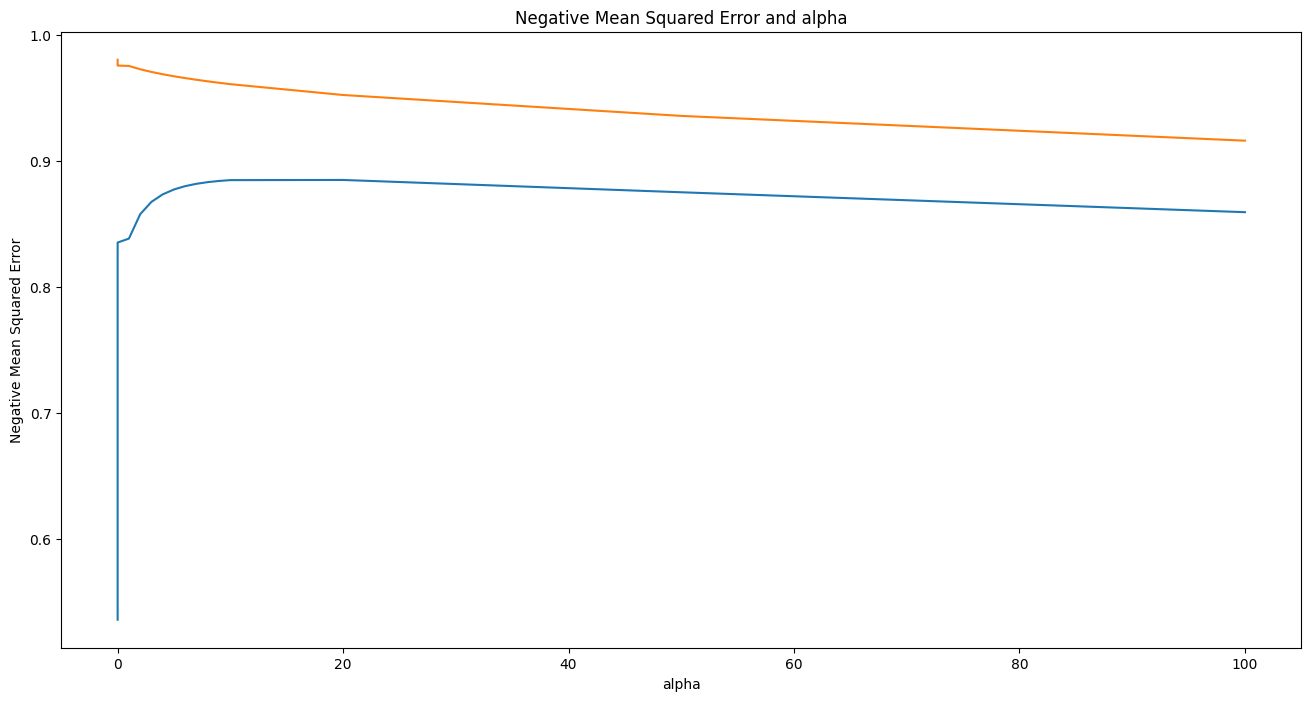

In [ ]:
# change datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and alpha")

In [ ]:
# checking best alpha from model_cv
model_cv.best_params_


{'alpha': 20}

In [ ]:
#sel alpha as 10
alpha = 10

# Initialise Ridge() with above alpha
ridge = linear_model.Ridge(alpha=alpha)

#fit model
ridge.fit(X_train, y_train)



#print ridge coeficients
ridge.coef_

array([-5.49685772e+02,  4.17666562e+02, -3.68506059e+01,  1.50926527e+03,
       -4.06887511e+02,  1.31988586e+03,  1.51499934e+03, -6.19381226e+01,
       -3.39580876e+02, -2.93535625e+01,  9.94522772e+02,  4.38449159e+02,
        4.94634948e+01, -4.15806342e+01,  2.98750806e+02,  2.07184870e+02,
        9.45180613e+01,  3.28558932e+01,  2.16109519e+02, -2.35803150e+02,
        4.59179309e+02,  6.28136763e+01, -2.49663717e+01, -5.93491553e+02,
       -3.57799855e+02, -2.46362056e+02, -2.24698186e+02,  1.95889305e+02,
        1.00638432e+03, -7.24193007e+01, -1.94214766e+02,  4.14908863e+02,
        1.13406861e+02, -3.57506199e+01,  1.32271027e+02, -5.97580041e+02,
       -5.84428942e+02, -2.04367801e+02,  3.27654927e+02, -3.20756216e+02,
        1.32271027e+02,  1.11239366e+02, -1.91418853e+02,  2.35803150e+02,
       -3.19987405e-28, -3.98184818e+01, -1.22606456e+02, -3.19987405e-28,
        2.68453146e+02,  1.40687973e+03,  1.01090268e+03, -2.42129156e+02,
       -5.18278710e+02, -

Lasso Regression

In [ ]:
# Initialise Lasso()
lasso = linear_model.Lasso()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be lasso
model_cv = GridSearchCV(estimator=lasso, param_grid=params, cv=folds, return_train_score=True)


#fit model_cv
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012811,0.002122,0.002543,0.000150,0.0001,{'alpha': 0.0001},0.738483,0.937144,0.575645,0.866604,...,0.669456,0.252084,28,0.988007,0.975244,0.981719,0.976978,0.977971,0.979984,0.004537
1,0.011970,0.000708,0.002660,0.000240,0.0010,{'alpha': 0.001},0.738467,0.937117,0.575617,0.866611,...,0.669629,0.251758,27,0.988006,0.975244,0.981719,0.976978,0.977971,0.979984,0.004537
2,0.012070,0.000893,0.002522,0.000162,0.0100,{'alpha': 0.01},0.738319,0.936920,0.575330,0.866684,...,0.671351,0.248548,26,0.988003,0.975241,0.981718,0.976975,0.977968,0.979981,0.004537
3,0.011439,0.000560,0.002482,0.000171,0.0500,{'alpha': 0.05},0.737772,0.936428,0.573923,0.867006,...,0.678699,0.235210,25,0.987986,0.975226,0.981712,0.976964,0.977954,0.979968,0.004536
4,0.012590,0.001124,0.002811,0.000405,0.1000,{'alpha': 0.1},0.737531,0.936016,0.571902,0.867408,...,0.687032,0.220618,24,0.987964,0.975208,0.981704,0.976949,0.977935,0.979952,0.004535


Text(0.5, 1.0, 'Accuracy and alpha')

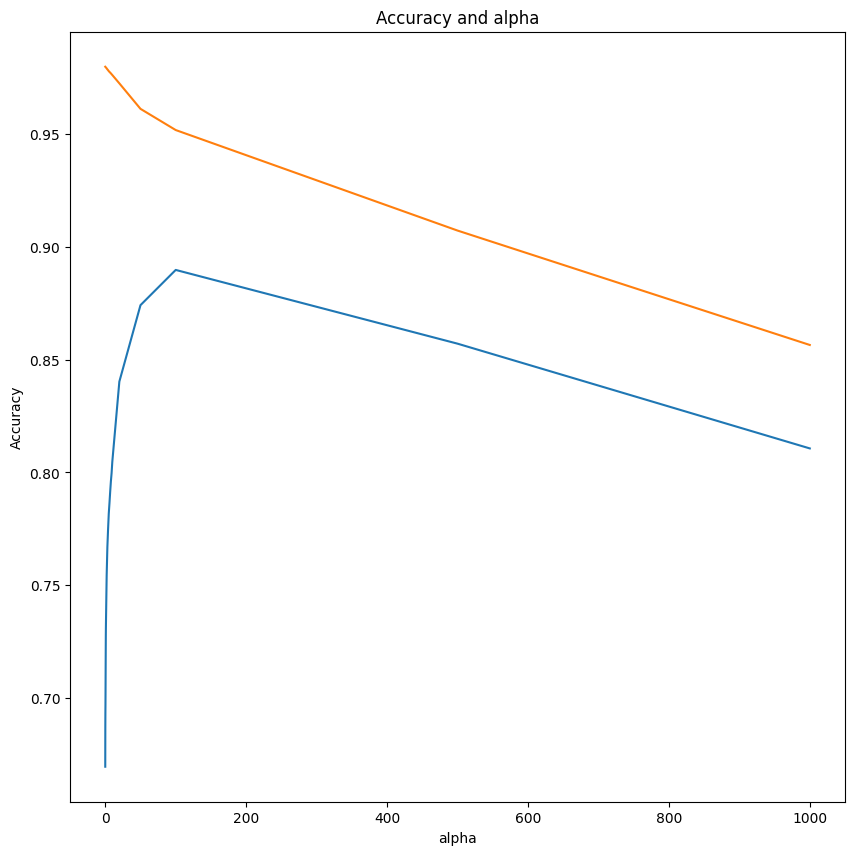

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title("Accuracy and alpha")

In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_

{'alpha': 100}

In [ ]:
# St alpha =100
alpha = 100

# Define lasso with above alpha
lasso = linear_model.Lasso(alpha=alpha)

# fit lasso
lasso.fit(X_train, y_train)

# print lasso coeficients
lasso.coef_

array([-128.12973848,    0.        ,   -0.        , 1769.95717886,
        -64.88945737, 1803.72192936,  790.76065623,   -0.        ,
         -0.        ,    0.        , 1006.14184791,   95.64803224,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,  263.21146624,  -51.73959811,
        126.11888194,    0.        ,    0.        , -199.33051383,
          0.        , -102.23928175, -120.03093273,  276.5189979 ,
       1217.8659338 ,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
       -205.77414662,   -0.        ,  195.09450993,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   83.43851715,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
        145.52178211, 1781.02866148, 1190.4505014 ,    0.        ,
         -0.        ,   -5.20913572,   75.53739207,  784.96700323,
         -0.        ,   -0.        , -395.29799055,  -44.92518

ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialise Lasso()
elasticnet = ElasticNet()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be ElasticNet
model_cv = GridSearchCV(estimator=elasticnet, param_grid=params, cv=folds, return_train_score=True)


#fit model_cv
model_cv.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True)

In [ ]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042362,0.010712,0.008421,0.003771,0.0001,{'alpha': 0.0001},0.737096,0.936522,0.594326,0.866668,...,0.684738,0.229763,23,0.987981,0.975192,0.981682,0.976949,0.977944,0.979949,0.004542
1,0.028023,0.006841,0.005392,0.001719,0.0010,{'alpha': 0.001},0.730579,0.932929,0.694548,0.868405,...,0.737587,0.163347,21,0.987739,0.974650,0.981265,0.976651,0.977557,0.979572,0.004613
2,0.026946,0.010102,0.005221,0.002856,0.0100,{'alpha': 0.01},0.742831,0.943269,0.804796,0.892938,...,0.821393,0.084941,15,0.986399,0.971292,0.978238,0.974332,0.974601,0.976972,0.005202
3,0.010527,0.002449,0.004764,0.001402,0.0500,{'alpha': 0.05},0.767784,0.951175,0.874603,0.904225,...,0.866672,0.062225,11,0.982532,0.964940,0.970751,0.968215,0.969086,0.971105,0.006019
4,0.017858,0.006649,0.008509,0.002417,0.1000,{'alpha': 0.1},0.777165,0.949221,0.896918,0.895646,...,0.879583,0.056388,6,0.978850,0.959993,0.965047,0.963634,0.964064,0.966318,0.006496


Text(0.5, 1.0, 'Accuracy and alpha')

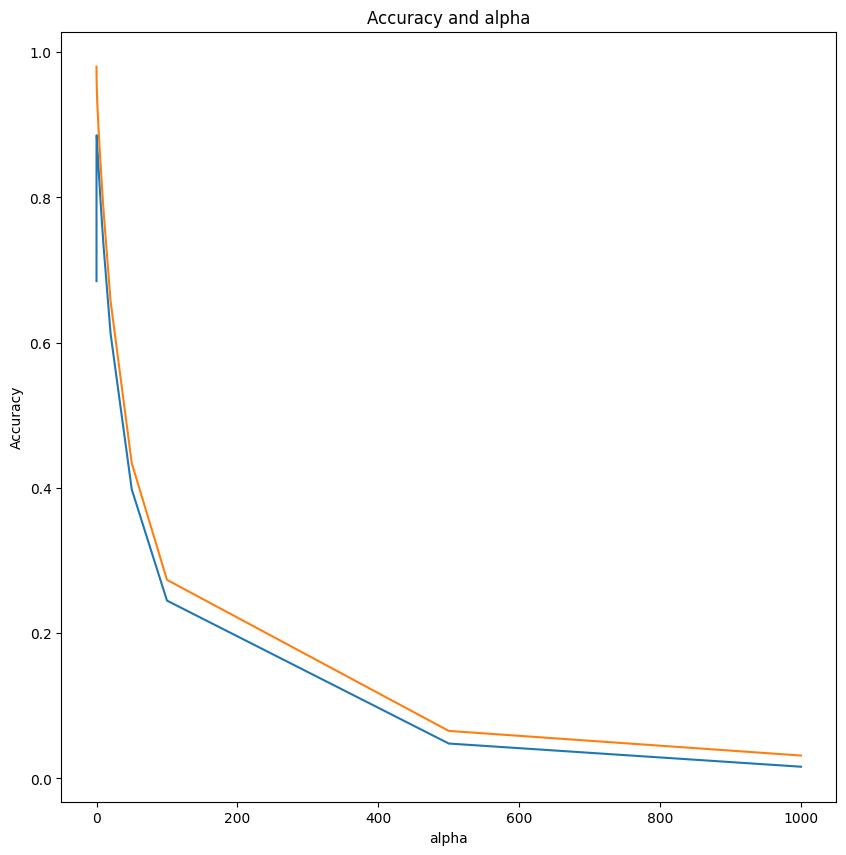

In [ ]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title("Accuracy and alpha")


In [ ]:
# Checking best  alpha from model_cv
model_cv.best_params_

{'alpha': 0.3}

In [ ]:
# St alpha =0.3
alpha = 0.3

# Define lasso with above alpha
elasticnet = ElasticNet(alpha=alpha)

# fit lasso
elasticnet.fit(X_train, y_train)



ElasticNet(alpha=0.3)

In [ ]:
# print lasso coeficients
elasticnet.coef_

array([-504.90804089,  386.26604123,  198.63647928, 1238.72949524,
       -227.85896606, 1041.38044565, 1173.93037987,  128.73023325,
       -232.763842  ,   56.80755879,  865.81725996,  270.98019553,
        -60.92582977, -125.88111615,  207.53001519,  102.71215608,
         -0.        ,  -45.43703799,  231.11927388, -194.95077477,
        391.88127657,   93.18441199,   88.86384125, -417.56158257,
       -164.17413966, -183.12574004, -259.04019274,  286.38004323,
        833.23368505,   40.36034482, -217.32504535,  279.97289374,
         52.30061312,   18.38193169,   65.71421452, -363.02967851,
       -592.95822379,    3.76030206,  258.58607186, -132.36734042,
         65.71181321,   25.90195212, -162.74017463,  194.94272819,
         -0.        ,   62.8564793 , -139.14951205,   -0.        ,
        204.49392197, 1263.05865692, 1000.7873563 , -139.69105447,
       -361.84527718, -298.04644482,  -54.49686436,  760.42420113,
       -258.39483284,   -0.        , -514.10388466, -349.49259

In [ ]:
# Calculate all 3 predictions
pred_l = lasso.predict(X_test)
pred_r = ridge.predict(X_test)
pred_en = elasticnet.predict(X_test)

In [ ]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error

# print RMSE for all 3 techniques
print("Lasso RMSE: ", np.sqrt(mean_squared_error(y_test, pred_l)))
print("Ridge RMSE: ", np.sqrt(mean_squared_error(y_test, pred_r)))
print("ElasticNet RMSE: ", np.sqrt(mean_squared_error(y_test, pred_en)))


Lasso RMSE:  2487.641946837406
Ridge RMSE:  2340.179406021892
ElasticNet RMSE:  2483.844593994618


In [ ]:
#importing libraries PolynomialFeatures, LinearRegression, Pipeline  , metrics from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
#fetching data
elec_cons = pd.read_csv("/content/total-electricity-consumption-us.csv")


In [ ]:
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [ ]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [ ]:
# checking NA
# there are no missing values in the dataset
elec_cons.isna().sum()


,0
Year,0
Consumption,0


In [ ]:
#Defining length of elec_cons index
size = len(elec_cons)

# Defining custom index which ranges from 0 to size and step size as  5
index = np.arange(0, size, 5)

#train will not have same index which is is defined above
train = elec_cons.iloc[index]

#test will have same index which is is defined above
test = elec_cons.iloc[~elec_cons.index.isin(index)]

In [ ]:
#print train and test length
print(len(train), len(test))

11 40


In [ ]:
# converting X to a two dimensional array, as required by the learning algorithm
#Making X_train two dimensional
X_train = np.array(train['Year']).reshape(-1,1)

#Defining y_train
y_train = np.array(train['Consumption'])

#Making X_test two dimensional
X_test = np.array(test['Year']).reshape(-1,1)

#Defining y_test
y_test = np.array(test['Consumption'])

In [ ]:
# Defining empty array r2_train and r2_test
r2_train = []
r2_test =  []

#Define degrees as list with 1,2 and 3 as elements
degrees = [1,2,3]

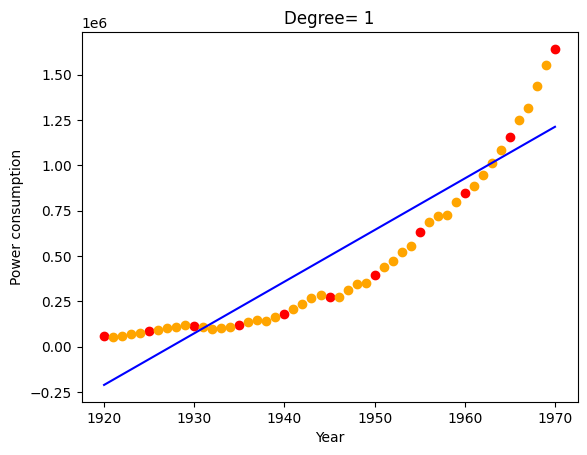

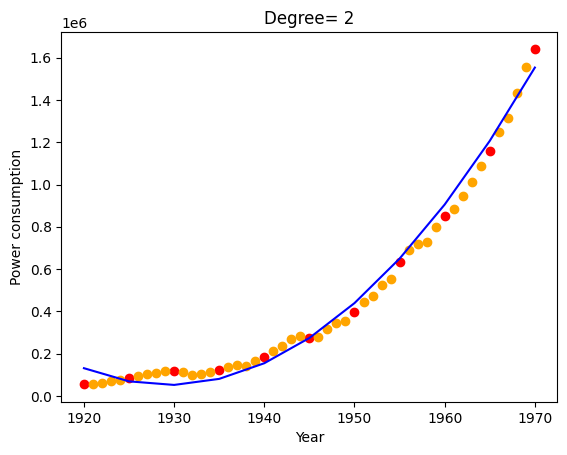

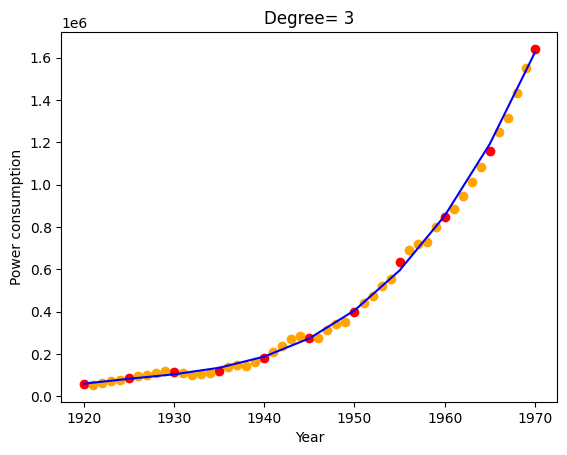

In [ ]:
# Iterating over each degree value

for degree in degrees:
#     initialising pipeline
    pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('linear', LinearRegression())])

    #fitting pipeline with train and test
    pipeline.fit(X_train, y_train)


    # test performance
    y_pred = pipeline.predict(X_test)

    #appending r2_test with r2_score
    r2_test.append(metrics.r2_score(y_test, y_pred))


    # training performance
    y_pred_train = pipeline.predict(X_train)

    #appending r2_train with r2_score
    r2_train.append(metrics.r2_score(y_train, y_pred_train))


# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))

    # train data in blue
    ax.scatter(X_train, y_train, color='red')

    # test data in green
    ax.scatter(X_test, y_test, color='orange')

    ax.plot(X_train, y_pred_train, color='blue')
    plt.show()

In [ ]:
# respective test r-squared scores of predictions
r2_test



[0.8307606597316345,
 0.9885076747892381,
 0.9977859071560756,
 0.8307606597316345,
 0.9885076747892381,
 0.9977859071560756]